In [76]:
import numpy as np 
from numpy.random import multivariate_normal
from numpy.random import normal
from sklearn.linear_model import LassoCV
from sklearn.linear_model import LassoLarsCV
from scipy import stats
from matplotlib import pyplot
import warnings
import random
warnings.filterwarnings("ignore")
# warnings.simplefilter("default")
from numpy import linalg as LA
import copy
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [77]:
sns.set_style('darkgrid')
plt.rc('axes',titlesize = 18)
plt.rc('axes',labelsize = 14)
plt.rc('xtick',labelsize= 13)
plt.rc('ytick',labelsize= 13)
plt.rc('legend',fontsize= 13)
plt.rc('font',size= 13)




In [121]:
#simultaition setting
n = 100
p = 150

#generating the covariates

Sigma2 = np.zeros([p,p])
rho = 0.6
for i in range(p):
    for j in range(p):
        Sigma2[i,j] = rho**abs(i-j)
        
Sigma1 = 0.8*np.ones([p,p])
np.fill_diagonal(Sigma1, 1)
mean1 = np.zeros(p)
random.seed(10)
Q = multivariate_normal(mean=mean1, cov=Sigma2, size = n)

#generate the noise
mu, sigma = 0, 0.1
ERR = normal(mu, sigma, n)

#set the true parameter 
beta = np.zeros(p)
beta[1:3]=1
beta[0]=0

#DGP1
Y = ERR + Q@beta

In [110]:
test = find_KK(10,0.05,can_KK)



In [117]:
test2 = find_KK(10,0.05,can_KK)

In [122]:
test3 = find_KK(10,0.05,can_KK)

(0.0, 0.1)

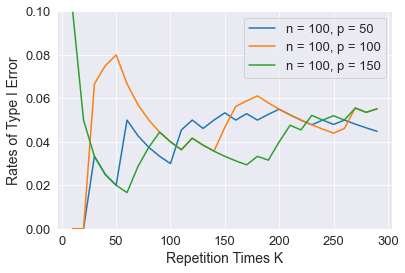

In [128]:
plt.plot(can_KK,test,label='n = 100, p = 50')
plt.plot(can_KK,test2, label='n = 100, p = 100' )
plt.plot(can_KK,test3, label='n = 100, p = 150')
plt.ylabel('Rates of Type I Error')
plt.xlabel('Repetition Times K')
# plt.title('')
plt.legend()
plt.ylim(0,0.1)

In [101]:
reg_desf = LassoCV(cv=5, random_state=0).fit(Q, Y)
est_beta = reg_desf.coef_
lambda_desf = reg_desf.alpha_

est_theta = est_beta[0]
est_gamma = est_beta[1:]

X = Q[:,1:]
Z = Q[:,0]
reg_w = LassoCV(cv=5, random_state=0).fit(X, Z)
est_w = reg_w.coef_


# 1. DeSF

In [102]:
def deco_score_function(est_beta, Y, Q, sigma):
    n,p = Q.shape
    X = Q[:,1:]
    Z = Q[:,0]
#     reg_desf = LassoCV(cv=5, random_state=0).fit(Q, Y)
#     est_beta = reg_desf.coef_
#     lambda_desf = reg_desf.alpha_
    est_theta = est_beta[0]
    est_gamma = est_beta[1:]
    reg_w = LassoCV(cv=5, random_state=0).fit(X, Z)
    est_w = reg_w.coef_
    
    desf = -(1/((sigma**2)*n))*np.dot(Y-X@est_gamma,Z-X@est_w)
    return desf

def u_score_function(est_beta,Y, Q, sigma):
    n,p = Q.shape
    X = Q[:,1:]
    Z = Q[:,0]
#     reg_desf = LassoCV(cv=5, random_state=0).fit(Q, Y)
#     est_beta = reg_desf.coef_
#     lambda_desf = reg_desf.alpha_

    est_theta = est_beta[0]
    est_gamma = est_beta[1:]
    reg_w = LassoCV(cv=5, random_state=0).fit(X, Z)
    est_w = reg_w.coef_
    
    desf = -(1/((sigma**2)*n))*np.dot(Y-X@est_gamma,Z-X@est_w)
    Z_matrix = np.repeat(np.reshape(Z,[n,1]),p-1, axis=1)#?
    I = 1/((sigma**2)*n)*(np.sum(Z**2)-np.sum(np.multiply(X,Z_matrix),axis=0)@est_w)
    u_score = n**(0.5)*desf*I**(-0.5)
    return u_score
    
    

In [104]:
#find the sample size
can_KK = np.arange(10,300,10)
def find_KK(seed,alpha,can_KK):
#     beta[0]=0
    rej_list = np.zeros(len(can_KK))
    for i in range(len(can_KK)):
        KK = can_KK[i]
        for j in range(KK):
            np.random.seed(seed+j)
            ERR_temp = normal(mu, sigma, n)
            Q_temp = multivariate_normal(mean=mean1, cov=Sigma2, size = n)
            p = len(mean1)
            hyp_beta = np.zeros(p)
            hyp_beta[1:3]=1
            Y_temp = ERR_temp + Q_temp@hyp_beta
            reg_temp = LassoCV(cv=5, random_state=0).fit(Q_temp, Y_temp)
            temp_beta = reg_temp.coef_ 
#             print(Y_temp[0])
            u_score = u_score_function(temp_beta, Y_temp,Q_temp,sigma)
            p_value = 1-2*(1-stats.norm.cdf(abs(u_score)))
            if p_value>1-alpha:
                rej_list[i]+=1
        rej_list[i] = rej_list[i]/KK
    
    return rej_list



In [86]:
test = find_KK(10,0.05,can_KK)
# can_KK2 = np.arange(10,200,10)
# test2 = find_KK(10,0.05,can_KK2)
# rates_list=np.concatenate((test2, test))
# KK_list = np.concatenate((can_KK2,can_KK))


In [95]:
test2 = find_KK(10,0.05,can_KK)

In [114]:
# print(test)

[0.         0.         0.03333333 0.025      0.02       0.05
 0.04285714 0.0375     0.03333333 0.03       0.04545455 0.05
 0.04615385 0.05       0.05333333 0.05       0.05294118 0.05
 0.05263158 0.055      0.05238095 0.05       0.04782609 0.05
 0.048      0.05       0.04814815 0.04642857 0.04482759]


In [105]:
test3 = find_KK(10,0.05,can_KK)

(0.0, 0.15)

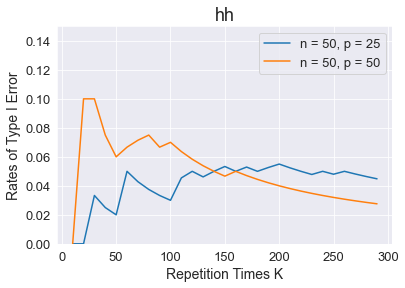

In [116]:
plt.plot(can_KK,test,label='n = 50, p = 25')
plt.plot(can_KK,test2, label='n = 50, p = 50' )
# plt.plot(can_KK,test3, label='n = 50, p = 75')
plt.ylabel('Rates of Type I Error')
plt.xlabel('Repetition Times K')
plt.title('hh')
plt.legend()
plt.ylim(0,0.15)

In [180]:
theta_candidate = np.linspace(0,0.05,20)
X = Q[:,1:]
Z = Q[:,0]
gamma = beta[1:]
rej_list = np.zeros(len(theta_candidate))
# for j in range(len(theta_candidate)):
#     KK = 100
#     u_list = np.zeros(KK)
#     warnings.filterwarnings("ignore")
#     random.seed(10)
KK = 100
# for i in range(KK):
#     ERR = normal(mu, sigma, n)
#     Q = multivariate_normal(mean=mean1, cov=Sigma1, size = n)
#     for j in range(len(theta_candidate)):
#         beta[0] = theta_candidate[j]
#         Y = ERR + Q@beta
#         u_score = u_score_function(Y,Q,sigma)
#         p_value = 1-2*(1-stats.norm.cdf(abs(u_score)))
#         if p_value>0.95:
#             rej_list[j]+=1



def test_power_simulation_desf(seed,KK,alpha):
#     beta[0]=0
    rej_list = np.zeros(len(theta_candidate))
    for i in range(KK):
        np.random.seed(seed+i)
        ERR_temp = normal(mu, sigma, n)
#         print(random.random())
        Q_temp = multivariate_normal(mean=mean1, cov=Sigma2, size = n)
        p = len(mean1)
        hyp_beta = np.zeros(p)
        hyp_beta[1:3]=1
        for j in range(len(theta_candidate)):
            hyp_beta[0] = theta_candidate[j]
            Y_temp = ERR_temp + Q_temp@hyp_beta
            reg_temp = LassoCV(cv=5, random_state=0).fit(Q_temp, Y_temp)
            temp_beta = reg_temp.coef_ 
#             print(temp_beta[0])
            u_score = u_score_function(temp_beta, Y_temp,Q_temp,sigma)
            p_value = 1-2*(1-stats.norm.cdf(abs(u_score)))
            if p_value>1-alpha:
                rej_list[j]+=1
    return rej_list
    

In [184]:
test_power_desf= test_power_simulation_desf(10,KK,0.1)
# print(beta)

In [192]:
print(test_power_desf/KK)

[0.08 0.13 0.2  0.27 0.32 0.37 0.44 0.53 0.6  0.63 0.7  0.73 0.8  0.87
 0.92 0.96 0.96 0.96 0.97 0.98]


In [185]:
# test_power_bootstrap= test_power_simulation_bootstrap(10,KK,0.1)

Text(0.5, 0, 'theta')

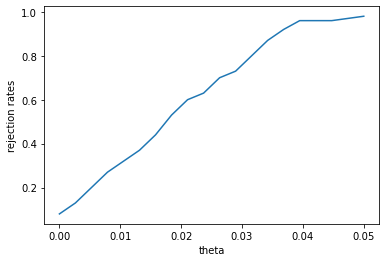

In [186]:
import matplotlib.pyplot as plt
plt.plot(theta_candidate,test_power_desf/KK)
plt.ylabel('rejection rates')
plt.xlabel('theta')

# 2. Bootstrap

check_errors = random.choices(demeaned_error,k = n)
check_Y = check_errors + Q@est_beta

In [24]:
test_stats, test_beta, est_sigma = bootstrap_statistics(est_beta, Y, Q, sigma)

# 3. LDPE

In [142]:
Q[:,1]
X = np.delete(Q,1,axis=1)
print(X.shape)

(100, 99)


In [143]:
def estimate_Sigma_inverse(Q):
    n,p = Q.shape
    est_C = np.zeros([p,p])
    score_list = np.zeros(p)
    for i in range(p):
        y = Q[:,i]
        X = np.delete(Q,i,axis=1)
        reg_i = LassoCV(cv=5, random_state=0).fit(X, y)
        gamma_i = reg_i.coef_
        alpha_i = reg_i.alpha_
        est_C[i] = np.insert(-gamma_i,i,1)
        score_list[i] = LA.norm(y-X@gamma_i,2)**2/n + alpha_i*LA.norm(gamma_i,1)
    est_T = np.diag(score_list**(-2))
    return est_T@est_C

def LDPE_beta(est_beta,Y,Q):
    n,p = Q.shape
    est_C = np.zeros([p,p])
    score_list = np.zeros(p)
    for i in range(p):
        y = Q[:,i]
        X = np.delete(Q,i,axis=1)
        reg_i = LassoCV(cv=5, random_state=0).fit(X, y)
        gamma_i = reg_i.coef_
        alpha_i = reg_i.alpha_
        est_C[i] = np.insert(-gamma_i,i,1)
        score_list[i] = LA.norm(y-X@gamma_i,2)**2/n + alpha_i*LA.norm(gamma_i,1)
    est_T = np.diag(score_list**(-2))
    est_inverse_Sigma = est_T@est_C
    return est_beta+(est_inverse_Sigma@Q.T@(Y-Q@est_beta))/n
 
def LDPE_statistics(est_beta, Y, Q, sigma):
    n,p = Q.shape
    est_C = np.zeros([p,p])
    score_list = np.zeros(p)
    for i in range(p):
        y = Q[:,i]
        X = np.delete(Q,i,axis=1)
        reg_i = LassoCV(cv=5, random_state=0).fit(X, y)
        gamma_i = reg_i.coef_
        alpha_i = reg_i.alpha_
        est_C[i] = np.insert(-gamma_i,i,1)
        score_list[i] = LA.norm(y-X@gamma_i,2)**2/n + alpha_i*LA.norm(gamma_i,1)
    est_T = np.diag(score_list**(-2))
    est_inverse_Sigma = est_T@est_C
    LDPE_beta = est_beta+(est_inverse_Sigma@Q.T@(Y-Q@est_beta))/n
    Sigma = sigma**2 * est_inverse_Sigma@(Q.T@Q)@est_inverse_Sigma.T/n
    return n**(0.5)*LDPE_beta[0]/Sigma[0,0]**0.5
        

In [144]:
print(est_beta)

[ 0.          0.97371176  0.99075434  0.          0.          0.
  0.          0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
  0.          0.          0.          0.         -0.         -0.
 -0.         -0.          0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.          0.
  0.         -0.         -0.         -0.         -0.         -0.
 -0.          0.          0.          0.          0.          0.
 -0.          0.          0.          0.         -0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.         -0.
 -0.          0.          0.          0.         -0.          0.
  0.          0.          0.          0.          0.          0.
 -0.         -0.         -0.         -0.         -0.         -0.
  0.         -0.         -0.         -0.         -0.         -0.
 -0.          0.         

In [145]:
# est_Sigma_inverse = estimate_Sigma_inverse(Q)
# test_beta = LDPE_beta(est_beta,Y,Q)
LDPE_stats = LDPE_statistics(est_beta, Y, Q, sigma)
print(LDPE_stats)

0.000496190513620893


In [146]:
theta_candidate = np.linspace(0,0.05,10)
def test_power_simulation_ldpe(seed,KK,alpha):
#     beta[0]=0
    rej_list = np.zeros(len(theta_candidate))
    for i in range(KK):
        np.random.seed(seed+i)
        ERR_temp = normal(mu, sigma, n)
#         print(random.random())
        Q_temp = multivariate_normal(mean=mean1, cov=Sigma2, size = n)
        p = len(mean1)
        hyp_beta = np.zeros(p)
        hyp_beta[1:3]=1
        for j in range(len(theta_candidate)):
            hyp_beta[0] = theta_candidate[j]
            Y_temp = ERR_temp + Q_temp@hyp_beta
            reg_temp = LassoCV(cv=5, random_state=0).fit(Q_temp, Y_temp)
            temp_beta = reg_temp.coef_ 
#             print(temp_beta[0])
            u_score = LDPE_statistics(temp_beta, Y_temp, Q_temp, sigma)
            p_value = 1-2*(1-stats.norm.cdf(abs(u_score)))
            if p_value>1-alpha:
                rej_list[j]+=1
    return rej_list
    

In [147]:
test_power_ldpe= test_power_simulation_ldpe(10,KK,0.1)

Text(0.5, 0, 'theta')

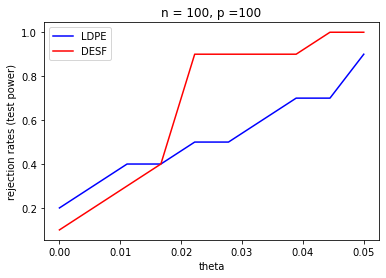

In [148]:
# plt.plot(theta_candidate,,test_power_desf/KK)
plt.plot(theta_candidate, test_power_ldpe/KK,"-b", label="LDPE")
plt.plot(theta_candidate, test_power_desf/KK, "-r", label="DESF")
plt.title('n = 100, p =100')
plt.legend(loc="upper left")
plt.ylabel('rejection rates (test power)')
plt.xlabel('theta')

In [200]:
est_beta

array([-0.00000000e+00,  1.00376235e+00,  9.61503735e-01,  0.00000000e+00,
        4.62181872e-03,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -4.81173263e-04,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        7.14392297e-03,  5.12838128e-04,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  1.35457385e-02,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00])

In [41]:
test.T

NameError: name 'test' is not defined

In [150]:
# np.fill_diagonal(test, 1, wrap = True)
print(test.shape)
# test.shape


(50, 50)


In [136]:
test= np.arange(5)
print(test)
np.insert(test,0,1)
print(test)

[0 1 2 3 4]
[0 1 2 3 4]
